In [1]:
from eyring_model import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 8
plt.rc('text.latex', preamble=r'\usepackage[cm]{sfmath}')

In [2]:
T = 300
multi = True
dH_barrier = 3.5
dS_barrier = -9/T
dH_sigma = dH_barrier/3
dS_sigma = -dS_barrier/3
n_paths = 2000 # infinite limit, approximately corresponds to unit area = 0.1 um^2

barrier_dist = 'equal'
barrier_params = {'mu' : np.array([dH_barrier, dS_barrier])}


#### Equal number of jumps, equal jump lengths, equal barriers

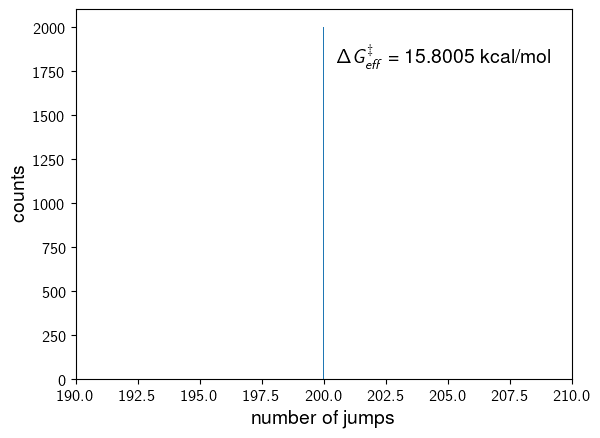

In [3]:
n_jump_params = {'mu' : 200}
rng = np.random.default_rng()
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)


dG0 = model.calculate_effective_barrier()

h, b, bar = plt.hist(n_jumps, bins=25)
plt.text(n_jump_params['mu']+0.5, h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('number of jumps', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xlim(190, 210)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Normally distributed number of jumps, equal jump lengths, equal barriers

**Mean = 200**

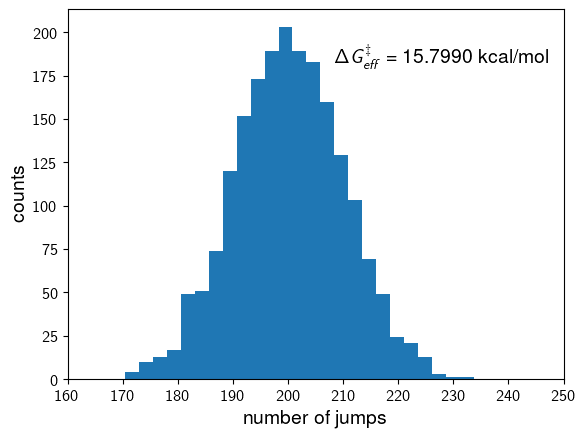

In [4]:
n_jump_params = {'mu' : 200,
                'sigma' : 10}
rng = np.random.default_rng()
n_jumps = rng.normal(loc=n_jump_params['mu'], scale=n_jump_params['sigma'], size=n_paths)

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)

h, b, bar = plt.hist(n_jumps, bins=25)
plt.text(b[-11], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('number of jumps', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xlim(160, 250)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

**Mean = 2000 jumps, std = 100**

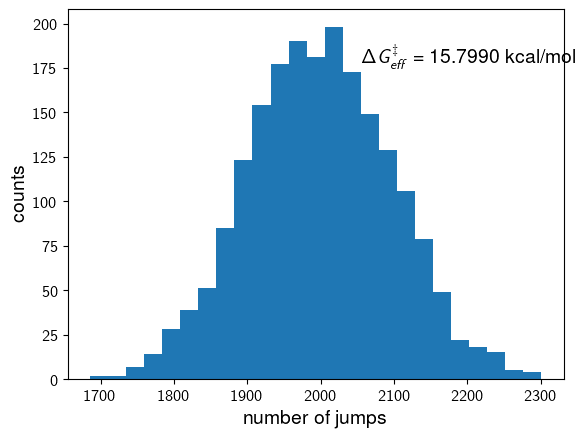

In [5]:
n_jump_params = {'mu' : 2000,
                'sigma' : 100}
rng = np.random.default_rng()
n_jumps = rng.normal(loc=n_jump_params['mu'], scale=n_jump_params['sigma'], size=n_paths)

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)

h, b, bar = plt.hist(n_jumps, bins=25)
plt.text(b[-11], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('number of jumps', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Exponentially distributed number of jumps, equal jump lengths, equal barriers

**Mean = 200**

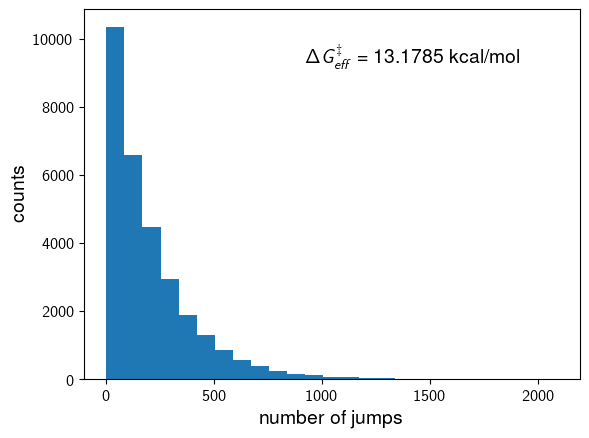

In [6]:
n_paths = 30_000

n_jump_params = {'beta' : 200}
rng = np.random.default_rng()
n_jumps = rng.exponential(n_jump_params['beta'], size=n_paths)

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n] // 1 + 1), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)

h, b, bar = plt.hist(n_jumps, bins=25)
plt.text(b[-15], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('number of jumps', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [7]:
model.calculate_permeability()
sorted_paths = np.array(model.paths)[model.permeabilities.argsort()]
print('Paths with low permeability:')
for p in sorted_paths[:5]:
    print(p.n_jumps)

print()

print('Paths with high permeability:')
for p in sorted_paths[-5:]:
    print(p.n_jumps)

Paths with low permeability:
2089
2032
1969
1935
1841

Paths with high permeability:
1
1
1
1
1


**Mean = 2000**

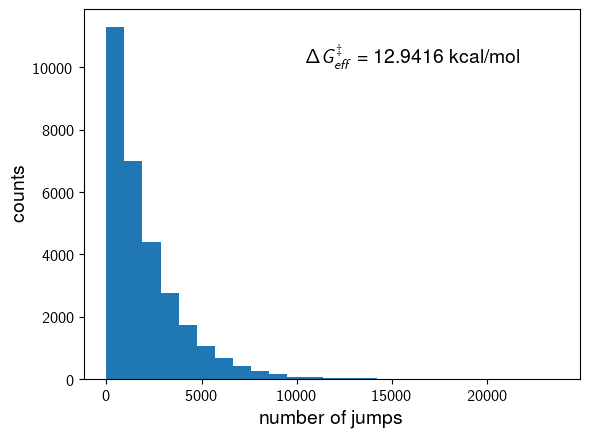

In [8]:
n_paths = 30_000

n_jump_params = {'beta' : 2000}
rng = np.random.default_rng()
n_jumps = rng.exponential(n_jump_params['beta'], size=n_paths)

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n] // 1 + 1), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)

h, b, bar = plt.hist(n_jumps, bins=25)
plt.text(b[-15], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('number of jumps', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Equal jump lengths, equal number of jumps, equal barriers

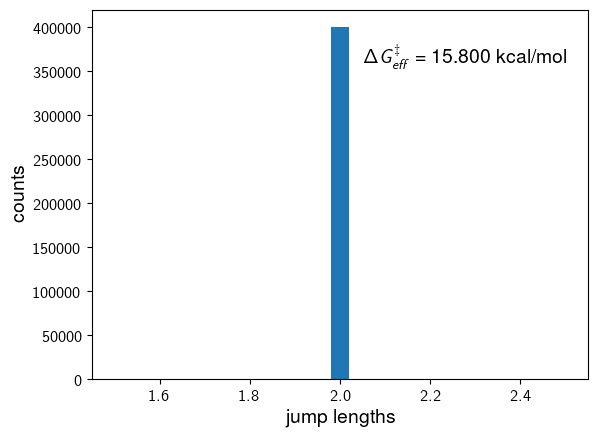

In [9]:
n_paths = 2000

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

n_jump_params = {'mu' : 200}
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_lengths = np.zeros((n_paths, n_jump_params['mu']))

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    jump_lengths[n,:] = model.paths[n].jump_lengths

h, b, bar = plt.hist(jump_lengths.flatten(), bins=25)
plt.text(jump_lengths.mean()+0.05, h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.3f} kcal/mol', fontsize=14)
plt.xlabel('jump lengths', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Normally distributed jump lengths, equal number of jumps, equal barriers

**Mean = 2**

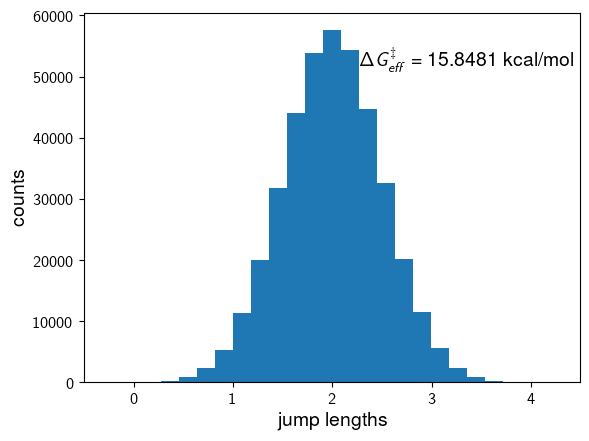

In [10]:
jump_length_dist = 'normal'
jump_length_params = {'mu' : 2, 'sigma' : 0.5}

n_jump_params = {'mu' : 200}
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_lengths = np.zeros((n_paths, n_jump_params['mu']))

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    jump_lengths[n,:] = model.paths[n].jump_lengths

h, b, bar = plt.hist(jump_lengths.flatten(), bins=25)
plt.text(b[-12], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('jump lengths', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

**Mean = 20**

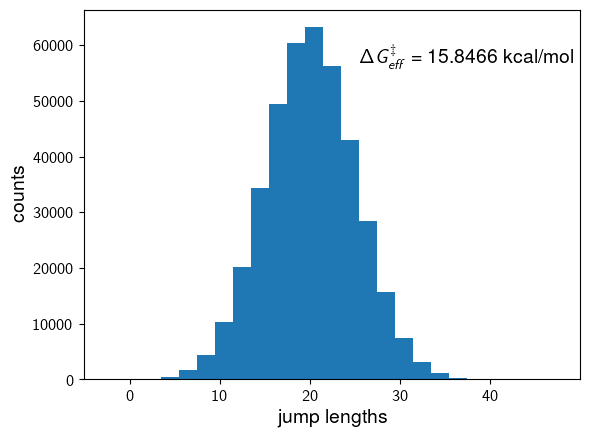

In [11]:
jump_length_dist = 'normal'
jump_length_params = {'mu' : 20, 'sigma' : 5}

n_jump_params = {'mu' : 200}
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_lengths = np.zeros((n_paths, n_jump_params['mu']))

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    jump_lengths[n,:] = model.paths[n].jump_lengths

h, b, bar = plt.hist(jump_lengths.flatten(), bins=25)
plt.text(b[-12], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('jump lengths', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Exponentially distributed jump lengths, equal number of jumps, equal barriers

**Mean = 2**

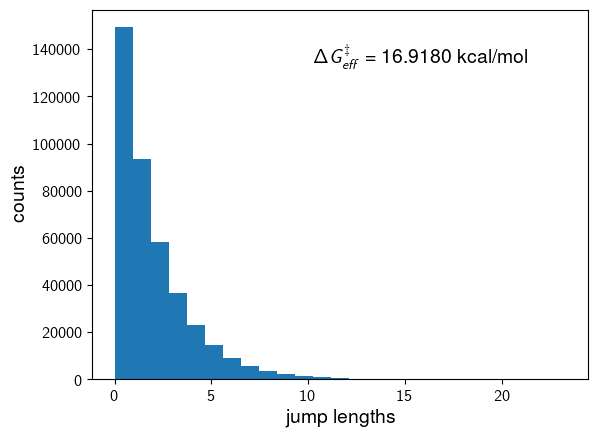

In [12]:
jump_length_dist = 'exponential'
jump_length_params = {'beta' : 2}

n_jump_params = {'mu' : 200}
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_lengths = np.zeros((n_paths, n_jump_params['mu']))

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['beta'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    jump_lengths[n,:] = model.paths[n].jump_lengths

h, b, bar = plt.hist(jump_lengths.flatten(), bins=25)
plt.text(b[-15], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('jump lengths', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [13]:
model.calculate_permeability()
sorted_paths = np.array(model.paths)[model.permeabilities.argsort()]
print('Paths with low permeability:')
print('mean, std, min, max')
for p in sorted_paths[:5]:
    print(p.jump_lengths.mean(), p.jump_lengths.std(),  p.jump_lengths.min(), p.jump_lengths.max())

print()

print('Paths with high permeability:')
print('mean, std, min, max')
for p in sorted_paths[-5:]:
    print(p.jump_lengths.mean(), p.jump_lengths.std(),  p.jump_lengths.min(), p.jump_lengths.max())

Paths with low permeability:
mean, std, min, max
2.187869901881213 2.0274901621539962 3.975755406357495e-06 10.012357605838433
1.7311485894335874 1.5754770120569912 5.542874880306415e-06 8.07873036567101
1.7771463319272953 1.7385914382786725 1.3057492500099929e-05 8.045618254428193
2.0087696734195926 2.2594728493768144 1.966587037104587e-05 12.102762912376631
1.908722474485114 1.7163865633871898 2.4561537924212153e-05 8.009725081854643

Paths with high permeability:
mean, std, min, max
2.0604076907648006 1.7058389113675338 0.030807049033078744 10.54611735214291
2.3516319216769688 2.125262365272339 0.03708533206979515 13.047934776996327
2.2220828267325583 2.2331872718750314 0.07008056147083108 14.346841653134167
2.099063936687929 1.7459401996543964 0.054651595558047286 9.371134911151561
2.0790397129105624 1.940347687345086 0.04257908018318507 12.796373476219964


**Mean = 20**

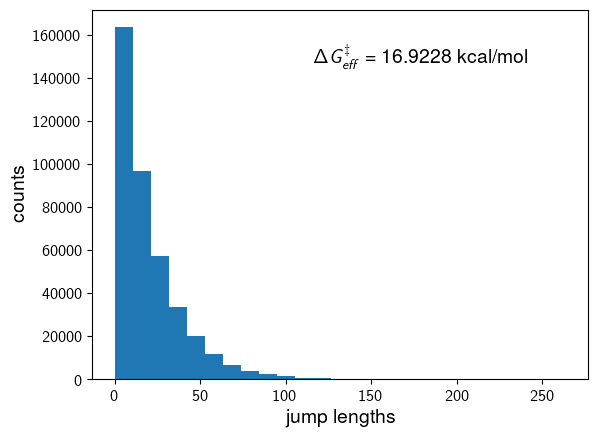

In [14]:
jump_length_dist = 'exponential'
jump_length_params = {'beta' : 20}

n_jump_params = {'mu' : 200}
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_lengths = np.zeros((n_paths, n_jump_params['mu']))

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['beta'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    jump_lengths[n,:] = model.paths[n].jump_lengths

h, b, bar = plt.hist(jump_lengths.flatten(), bins=25)
plt.text(b[-15], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('jump lengths', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Normally distributed number of jumps, normally distributed jump lengths, equal barriers

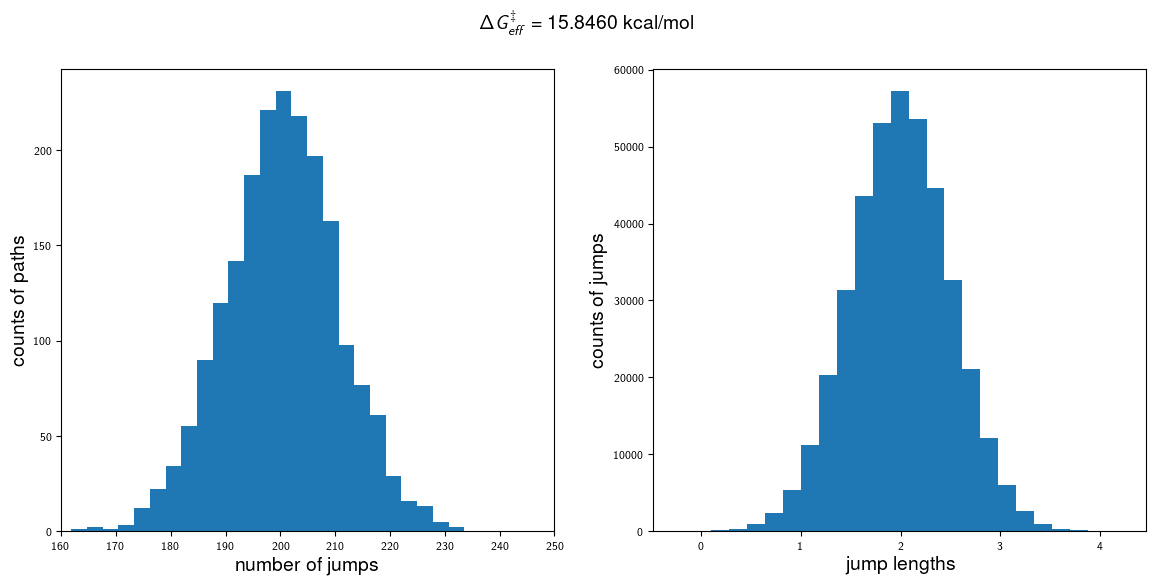

In [15]:
n_jump_params = {'mu' : 200,
                'sigma' : 10}
rng = np.random.default_rng()
n_jumps = rng.normal(loc=n_jump_params['mu'], scale=n_jump_params['sigma'], size=n_paths)

jump_length_dist = 'normal'
jump_length_params = {'mu' : 2, 'sigma' : 0.5}

jump_lengths = []

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    [jump_lengths.append(lam) for lam in model.paths[n].jump_lengths]

fig, ax = plt.subplots(1,2, figsize=(14,6))
plt.suptitle(f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)

h, b, bar = ax[0].hist(n_jumps, bins=25)
ax[0].set_xlabel('number of jumps', fontsize=14)
ax[0].set_ylabel('counts of paths', fontsize=14)
ax[0].set_xlim(160, 250)

h, b, bar = ax[1].hist(jump_lengths, bins=25)
ax[1].set_xlabel('jump lengths', fontsize=14)
ax[1].set_ylabel('counts of jumps', fontsize=14);

#### Normally distributed number of jumps, exponentially distributed jump lengths, equal barriers

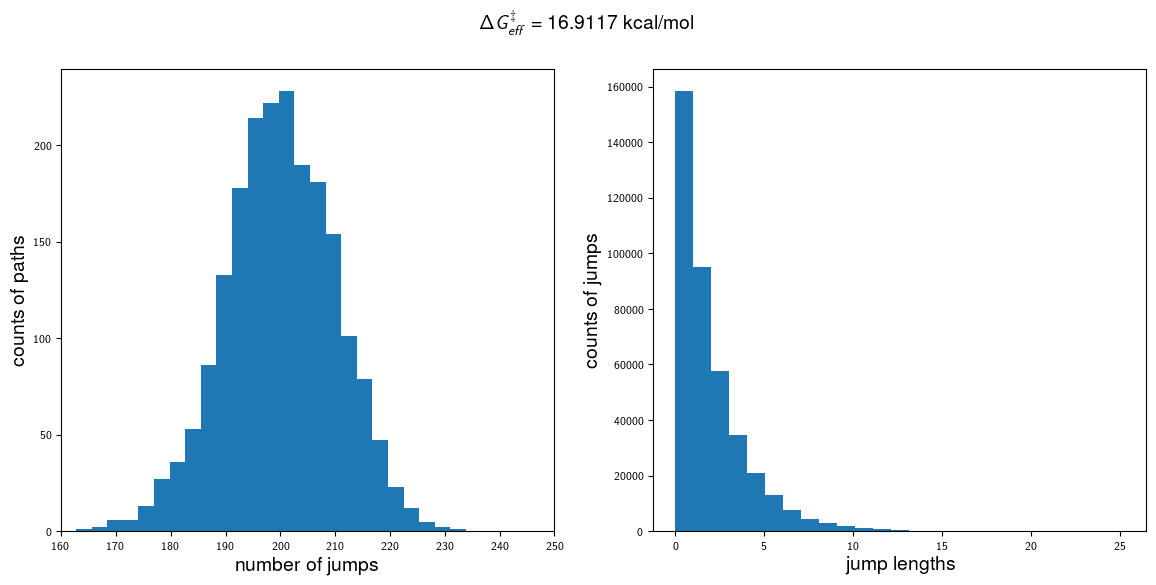

In [16]:
n_jump_params = {'mu' : 200,
                'sigma' : 10}
rng = np.random.default_rng()
n_jumps = rng.normal(loc=n_jump_params['mu'], scale=n_jump_params['sigma'], size=n_paths)

jump_length_dist = 'exponential'
jump_length_params = {'beta' : 2}

jump_lengths = []

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['beta'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    [jump_lengths.append(lam) for lam in model.paths[n].jump_lengths]

fig, ax = plt.subplots(1,2, figsize=(14,6))
plt.suptitle(f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)

h, b, bar = ax[0].hist(n_jumps, bins=25)
ax[0].set_xlabel('number of jumps', fontsize=14)
ax[0].set_ylabel('counts of paths', fontsize=14)
ax[0].set_xlim(160, 250)

h, b, bar = ax[1].hist(jump_lengths, bins=25)
ax[1].set_xlabel('jump lengths', fontsize=14)
ax[1].set_ylabel('counts of jumps', fontsize=14);

#### Exponentially distributed number of jumps, normally distributed jump lengths, equal barriers

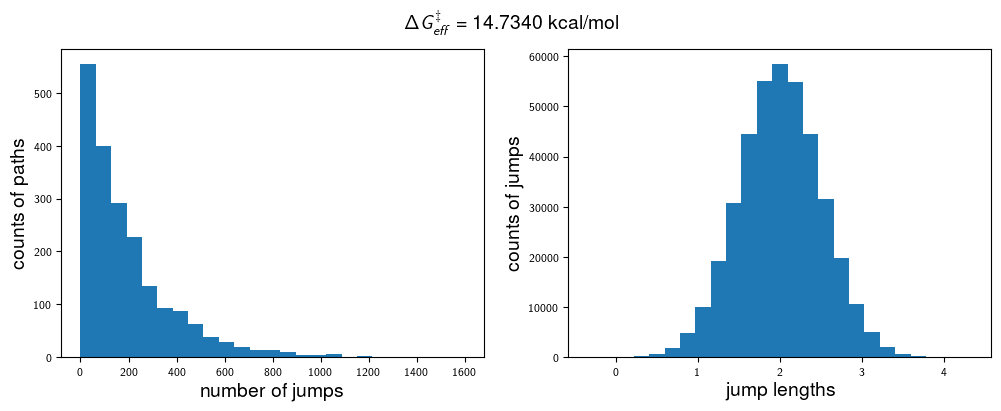

In [17]:
n_jump_params = {'beta' : 200}
rng = np.random.default_rng()
n_jumps = rng.exponential(n_jump_params['beta'], size=n_paths)

jump_length_dist = 'normal'
jump_length_params = {'mu' : 2, 'sigma' : 0.5}

jump_lengths = []

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n] // 1 + 1), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    [jump_lengths.append(lam) for lam in model.paths[n].jump_lengths]

fig, ax = plt.subplots(1,2, figsize=(12,4))
plt.suptitle(f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)

h, b, bar = ax[0].hist(n_jumps, bins=25)
ax[0].set_xlabel('number of jumps', fontsize=14)
ax[0].set_ylabel('counts of paths', fontsize=14)

h, b, bar = ax[1].hist(jump_lengths, bins=25)
ax[1].set_xlabel('jump lengths', fontsize=14)
ax[1].set_ylabel('counts of jumps', fontsize=14);

#### Exponentially distributed number of jumps, exponentially distributed jump lengths, equal barriers

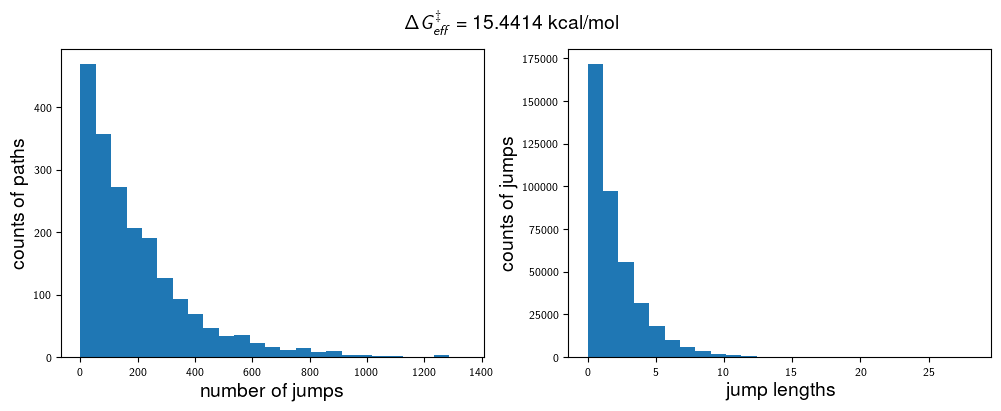

In [18]:
n_jump_params = {'beta' : 200}
rng = np.random.default_rng()
n_jumps = rng.exponential(n_jump_params['beta'], size=n_paths)

jump_length_dist = 'exponential'
jump_length_params = {'beta' : 2}

jump_lengths = []

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n] // 1 + 1), lam=jump_length_params['beta'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    [jump_lengths.append(lam) for lam in model.paths[n].jump_lengths]

fig, ax = plt.subplots(1,2, figsize=(12,4))
plt.suptitle(f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)

h, b, bar = ax[0].hist(n_jumps, bins=25)
ax[0].set_xlabel('number of jumps', fontsize=14)
ax[0].set_ylabel('counts of paths', fontsize=14)

h, b, bar = ax[1].hist(jump_lengths, bins=25)
ax[1].set_xlabel('jump lengths', fontsize=14)
ax[1].set_ylabel('counts of jumps', fontsize=14);

### Normal distributions for both length and number, sweeping through variance

In [19]:
import matplotlib.colors as mcolors

In [60]:
n_paths = 5000

len_sigs = np.linspace(0.1, 20, 20)
num_sigs = np.hstack([np.linspace(2, 100, 10),np.linspace(110,400, 10)])

effective_barriers = np.zeros((len(len_sigs),len(num_sigs)))
for i,ls in enumerate(len_sigs):
    for j,ns in enumerate(num_sigs):
        n_jump_params = {'mu' : 200,
                        'sigma' : ns}
        rng = np.random.default_rng()
        n_jumps = rng.normal(loc=n_jump_params['mu'], scale=n_jump_params['sigma'], size=n_paths)
        idx = np.where(n_jumps <= 1)[0]
        if len(idx) > 0:
            n_jumps[idx] = 1

        jump_length_dist = 'normal'
        jump_length_params = {'mu' : 2, 'sigma' : ls}

        model = EyringModel(T=T)
        for n in range(n_paths):
            model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
            model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
            model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
            idx = np.where(model.paths[n].jump_lengths <= 0)[0]
            if len(idx) > 0:
                model.paths[n].jump_lengths[idx] = 0.001

        effective_barriers[i,j] = model.calculate_effective_barrier()

In [61]:
dG_min, dG_max = effective_barriers.min(), effective_barriers.max()
max_diff = dG_max - dG0
min_diff = dG0 - dG_min
print(dG_min, dG_max, max_diff, min_diff)

12.579300446177317 21.112842187041228 5.31238556949544 3.22115617136847


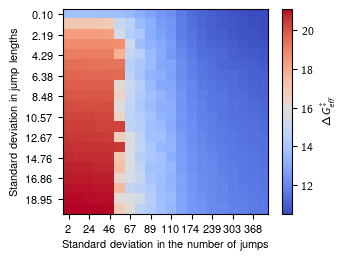

In [62]:
fig, ax = plt.subplots(1,1, figsize=(3.55, 2.6625))

len_sigs = np.linspace(0.1, 20, 20)
num_sigs = np.hstack([np.linspace(2, 100, 10),np.linspace(110,400, 10)])

n_labels = [f'{ns:.0f}' for ns in num_sigs]
l_labels = [f'{ls:.2f}' for ls in len_sigs]

ax.imshow(effective_barriers, cmap='coolwarm')
ax.xaxis.set_ticks(np.arange(0, len(num_sigs), step=2), labels=n_labels[::2])
ax.yaxis.set_ticks(np.arange(0, len(len_sigs), step=2), labels=l_labels[::2])

norm = mcolors.Normalize()
cb = fig.colorbar(plt.cm.ScalarMappable(norm=mcolors.Normalize(dG0-max_diff,dG0+max_diff), cmap='coolwarm'), ax=ax)
cb.set_label(label='$\Delta G_{eff}^{\ddag}$')

ax.set_xlabel('Standard deviation in the number of jumps')
ax.set_ylabel('Standard deviation in jump lengths')

fig.savefig('figs/length_number_competition.pdf')

In [40]:
n_paths = 5000

len_sigs = np.linspace(0.01, 20, 100)

len_dG = np.zeros((len(len_sigs)))
for i,ls in enumerate(len_sigs):

    jump_length_dist = 'normal'
    jump_length_params = {'mu' : 2, 'sigma' : ls}

    model = EyringModel(T=T)
    for n in range(n_paths):
        model.add_Path(n_jumps=200, lam=jump_length_params['mu'])
        model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
        model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
        idx = np.where(model.paths[n].jump_lengths <= 0)[0]
        if len(idx) > 0:
            model.paths[n].jump_lengths[idx] = 0.001

    len_dG[i] = model.calculate_effective_barrier()


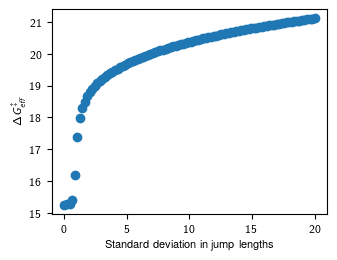

In [46]:
fig, ax = plt.subplots(1,1, figsize=(3.55,2.6625))
plt.scatter(len_sigs, len_dG)
plt.ylabel('$\Delta G_{eff}^{\ddag}$')
plt.xlabel('Standard deviation in jump lengths')
# plt.yticks(np.arange(15,20.5,0.5))
plt.savefig('figs/jump_length_variance.pdf')

In [50]:
n_paths = 5000

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

num_sigs = np.linspace(2, 400, 100)
num_dG = np.zeros((len(num_sigs)))

for j,ns in enumerate(num_sigs):
    n_jump_params = {'mu' : 200,
                    'sigma' : ns}
    rng = np.random.default_rng()
    n_jumps = rng.normal(loc=n_jump_params['mu'], scale=n_jump_params['sigma'], size=n_paths)
    idx = np.where(n_jumps <= 1)[0]
    if len(idx) > 0:
        n_jumps[idx] = 1

    model = EyringModel(T=T)
    for n in range(n_paths):
        model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
        model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
        model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)

    num_dG[j] = model.calculate_effective_barrier()

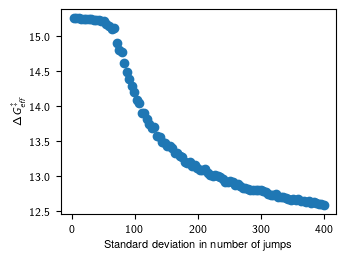

In [52]:
num_sigs = np.linspace(2, 400, 100)
fig, ax = plt.subplots(1,1, figsize=(3.55,2.6625))
plt.scatter(num_sigs, num_dG)
plt.ylabel('$\Delta G_{eff}^{\ddag}$')
plt.xlabel('Standard deviation in number of jumps')
# plt.ylim(13,15.5)
plt.savefig('figs/jump_number_variance.pdf')